**<center><font color='blue' size='+3'>Proceso KDD  de México</font></center>**

Los datos se han descarago de la siguiente página web: https://www.gob.mx/sesnsp/acciones-y-programas/datos-abiertos-de-incidencia-delictiva
 en la opción: Cifras de Incidencia Delictiva Municipal, 2015 - abril 2023.

Una vez descargada la información de subio el archivo con los datos a GitGub: https://github.com/JGeo20/TFM, con el siguiente nombre **IDM_NM_feb23.csv**

# KDD

Proceso de identificación de patrones y relaciones ocultas dentro de
los datos

## Selección de datos

Conexión con GitHub

In [ ]:
import pandas as pd
url = 'https://media.githubusercontent.com/media/JGeo20/TFM/main/IDM_NM_feb23.csv'
df = pd.read_csv(url, encoding='latin-1')

In [ ]:
df.shape

(2075738, 21)

In [ ]:
df.head()


,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape


(2075738, 21)

Eliminacion de  campos redundantes

In [ ]:
columns_to_drop = ['Clave_Ent', 'Cve. Municipio']
df = df.drop(columns=columns_to_drop, axis=1)

Filtrado:
- Se necesita de los años 2015 a 2022
- Se necesita Tipo de delito= Homicidio
- Se necesita Subtipo de delito = Himicidio doloso

In [ ]:
df=df.loc[df['Año'] != 2023]
df=df.loc[df['Tipo de delito'] == 'Homicidio']
df=df.loc[df['Subtipo de delito'] == 'Homicidio doloso']


In [ ]:
df.shape

(74792, 19)

In [ ]:
df.head()

,Año,Entidad,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Aguascalientes,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
1,2015,Aguascalientes,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2015,Aguascalientes,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,1.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,Aguascalientes,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,2015,Aguascalientes,Asientos,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eliminación de campos

In [ ]:
columns_to_drop = ['Tipo de delito','Subtipo de delito','Municipio','Bien jurídico afectado','Modalidad']
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
df.head()

,Año,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Aguascalientes,2,0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
1,2015,Aguascalientes,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2015,Aguascalientes,0,0,1.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,Aguascalientes,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,2015,Aguascalientes,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(74792, 14)

## Preporcesamiento de datos

In [ ]:
df.dtypes

Año             int64
Entidad        object
Enero           int64
Febrero         int64
Marzo         float64
Abril         float64
Mayo          float64
Junio         float64
Julio         float64
Agosto        float64
Septiembre    float64
Octubre       float64
Noviembre     float64
Diciembre     float64
dtype: object

Son de tipo float64 lo que es inconsistente, por lo tanto de debe convertir a entero.

In [ ]:
#se transforma todo a entero
col_num = df.select_dtypes(include=['number']).columns
df[col_num] = df[col_num].astype(int)
df.dtypes

Año            int64
Entidad       object
Enero          int64
Febrero        int64
Marzo          int64
Abril          int64
Mayo           int64
Junio          int64
Julio          int64
Agosto         int64
Septiembre     int64
Octubre        int64
Noviembre      int64
Diciembre      int64
dtype: object

In [ ]:
df.head()

,Año,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Aguascalientes,2,0,1,1,0,1,1,0,2,1,0,1
1,2015,Aguascalientes,1,1,0,0,0,1,0,1,0,0,0,0
2,2015,Aguascalientes,0,0,1,1,3,2,0,1,2,0,0,0
3,2015,Aguascalientes,1,0,0,1,0,0,0,0,0,0,0,0
98,2015,Aguascalientes,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(74792, 14)

### Missing Values

In [ ]:
df.isnull().sum()

Año           0
Entidad       0
Enero         0
Febrero       0
Marzo         0
Abril         0
Mayo          0
Junio         0
Julio         0
Agosto        0
Septiembre    0
Octubre       0
Noviembre     0
Diciembre     0
dtype: int64

no existen valores perdidos.

### Valores inconsitentes

In [ ]:
neg = df.iloc[:, 2:].apply(lambda column: column[column < 0].sum()).sum()
neg

0

No existen valores inconsistentes.

Fechas fuera de rango

In [ ]:
import pandas as pd
fecha_inicio = 2015
fecha_fin = 2022

fechas_fuera_de_rango = (df['Año'] < fecha_inicio) | (df['Año'] > fecha_fin)
cantidad_fechas_fuera_de_rango = fechas_fuera_de_rango.sum()

print(cantidad_fechas_fuera_de_rango)

0


No existen fechas fiuera de rango.

## Trasformación de datos

### Estandarización de base de datos

In [ ]:
df=df.groupby(['Año','Entidad']).sum().reset_index()

In [ ]:
df.head()

,Año,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Aguascalientes,6,1,4,4,4,4,2,3,4,2,2,2
1,2015,Baja California,49,56,56,60,75,76,72,77,86,68,78,68
2,2015,Baja California Sur,17,7,8,16,16,6,11,23,29,6,7,5
3,2015,Campeche,2,3,9,4,7,5,0,3,3,4,3,6
4,2015,Chiapas,37,40,32,48,40,38,34,57,53,45,40,38


In [ ]:
# Derretir el DataFrame original y seleccionar las columnas deseadas
d=df.drop(['Año','Entidad',],axis=1)
m = d.melt(var_name='Mes', value_name='Num_casos')

# Ordenar el DataFrame resultante por la columna 'etiqueta'
m= m.sort_index(axis=1)

In [ ]:
from itertools import repeat

# Repetir la columna A 5 veces
repeated_cols = []
for i in range(len(d.columns)):
    repeated_cols.append(df['Año'])

# Concatenar las columnas repetidas en un nuevo DataFrame
rep = pd.concat(repeated_cols, axis=0)
rep=pd.DataFrame(rep).reset_index(drop=True)

In [ ]:
from itertools import repeat

# Repetir la columna A 5 veces
repeated_cols = []
for i in range(len(d.columns)):
    repeated_cols.append(df['Entidad'])

# Concatenar las columnas repetidas en un nuevo DataFrame
en = pd.concat(repeated_cols, axis=0)
en=pd.DataFrame(en).reset_index(drop=True)

In [ ]:
dat=pd.concat([en,rep,m],axis=1)
dat.head()

,Entidad,Año,Mes,Num_casos
0,Aguascalientes,2015,Enero,6
1,Baja California,2015,Enero,49
2,Baja California Sur,2015,Enero,17
3,Campeche,2015,Enero,2
4,Chiapas,2015,Enero,37


In [ ]:
dat.shape

(3072, 4)

## Minería de datos

### Mapa de calor por Entidad y Mes

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_pivot = dat.pivot(index='Entidad', columns=['Año', 'Mes'], values='Num_casos')
df_pivot = df_pivot.groupby(level=1, axis=1).sum()
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_pivot = df_pivot.reindex(columns=meses_ordenados)
df_pivot

Mes,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Entidad,,,,,,,,,,,,
Aguascalientes,42,37,47,40,60,54,38,46,53,53,32,40
Baja California,1348,1156,1336,1368,1533,1472,1608,1535,1521,1452,1447,1401
Baja California Sur,137,85,125,76,88,77,85,126,147,156,143,124
Campeche,42,48,42,32,61,52,47,64,48,51,42,58
Chiapas,316,311,317,327,302,326,325,321,322,301,298,291
Chihuahua,1014,994,1068,1048,1298,1348,1301,1360,1084,1143,1048,1030
Ciudad de México,654,643,725,718,787,687,694,643,642,662,674,740
Coahuila de Zaragoza,191,118,140,147,154,134,151,104,135,99,122,126
Colima,359,340,375,352,370,361,356,339,364,397,376,407


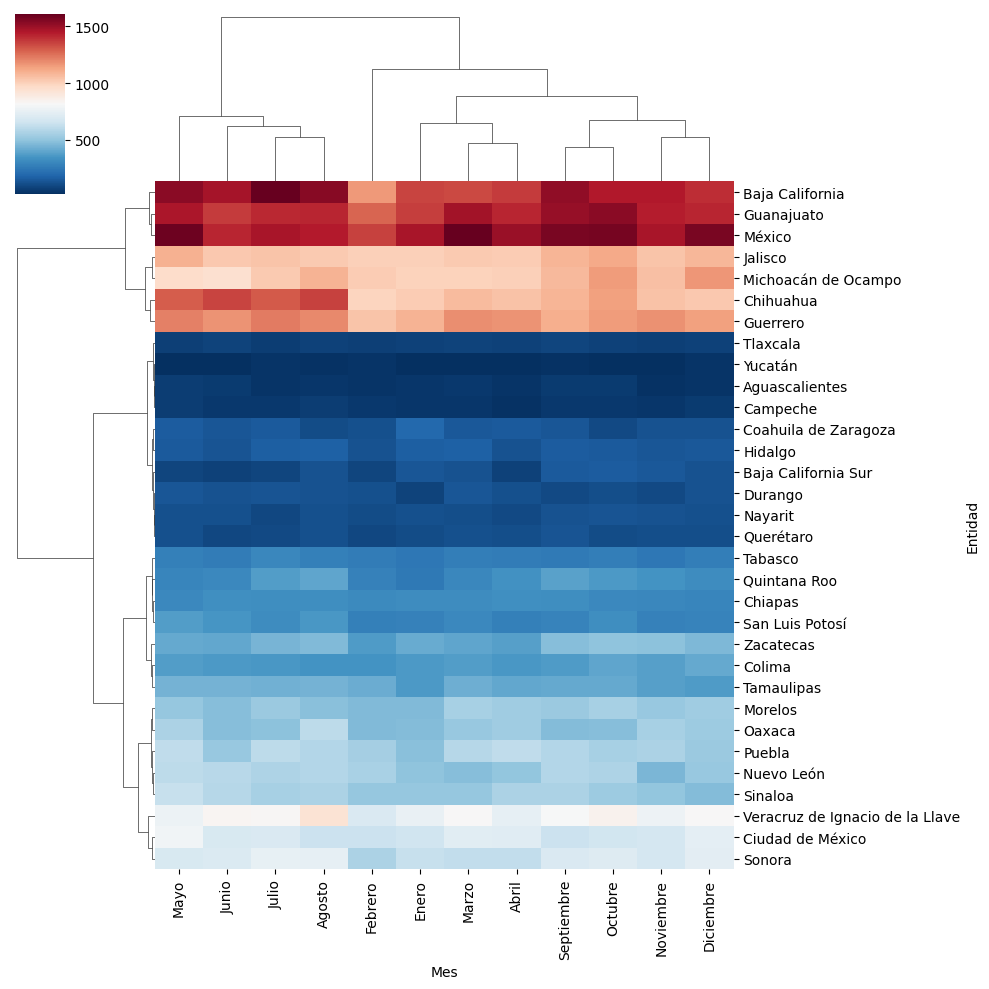

In [ ]:
# Crear el mapa de clústeres con las puntuaciones en cada recuadro
sns.clustermap(df_pivot, metric="euclidean", method="ward", cmap="RdBu_r")
plt.show()

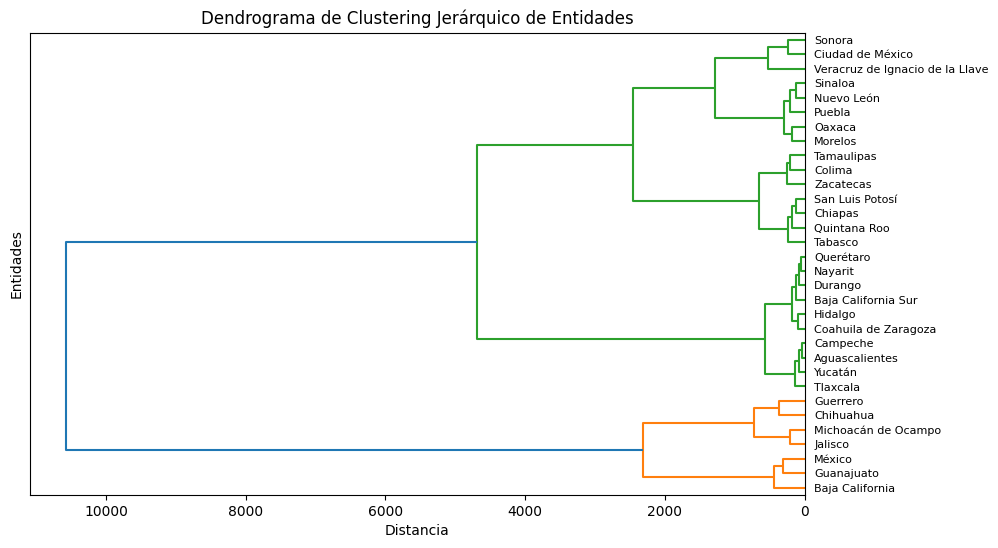

In [ ]:

import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
distance_matrix = hierarchy.distance.pdist(df_pivot, metric='euclidean')

# Realizar el clustering jerárquico
linkage_matrix = hierarchy.linkage(distance_matrix, method='ward')

# Generar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df_pivot.index, orientation='left')

plt.title('Dendrograma de Clustering Jerárquico de Entidades')
plt.xlabel('Distancia')
plt.ylabel('Entidades')
plt.show()

### Mapa de calor por Entidad y año

In [ ]:
df_pivot = dat.pivot(index='Entidad', columns=['Mes', 'Año'], values='Num_casos')
df_pivot = df_pivot.groupby(level=1, axis=1).sum()
df_pivot

Año,2015,2016,2017,2018,2019,2020,2021,2022
Entidad,,,,,,,,
Aguascalientes,38,39,82,75,91,72,75,70
Baja California,821,1168,2084,2798,2606,2629,2670,2401
Baja California Sur,151,216,610,162,81,62,48,39
Campeche,49,81,66,69,73,77,85,87
Chiapas,502,468,475,562,525,419,429,377
Chihuahua,945,1232,1566,1807,2179,2296,2059,1652
Ciudad de México,798,906,1048,1364,1396,1128,921,708
Coahuila de Zaragoza,278,212,222,228,222,194,137,128
Colima,162,502,698,617,661,544,474,738


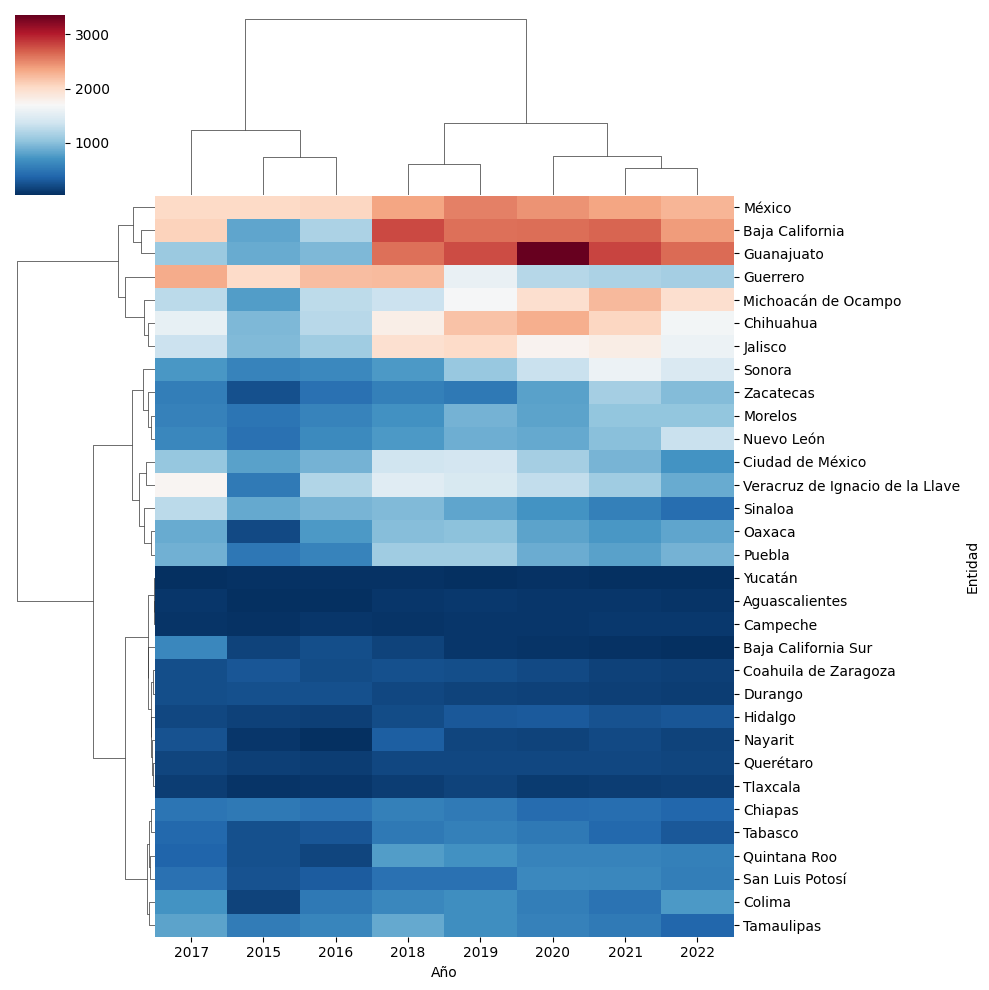

In [ ]:
# Crear el mapa de clústeres con las puntuaciones en cada recuadro
sns.clustermap(df_pivot, metric="euclidean", method="ward", cmap="RdBu_r")
plt.show()

## Evaluación

 **mapa de calor de casos de homicidios por Provincia y Mes de México**

  Se identifican 5 grupos, en la parte de Entidad:

1.	 Baja California, Guanajuato y el Estado de México.

2.	 Jalisco, Michoacán de Ocampo, Chihuahua y Guerrero.

3.	 Tlaxcala, Yucatán, Aguascalien-tes, Campeche, Coahuila de Zaragoza, Hidalgo, Baja California Sur, Durango, Nayarit y Querétaro.

4.	Tabasco, Quintana Roo, Chiapas, San Luis Potosí, Zacatecas, Colima, Tamaulipas con una incidencia baja.

5.	Morelos, Oaxaca, Puebla, Nuevo León, Sinaloa, Veracruz de Ignacio de la Llave, Ciudad de México y Sonora.

Se identifican 2 grupos en la parte de meses:
1.  mayo, junio, julio y agosto

2. enero, febrero, marzo, abril, septiembre, octubre, noviembre y diciembre.

**mapa de calor de casos de homicidios por Provincia y Año de México**

 Se identificaron dos grupos en cuanto a los años

1. 2015, 2016 y 2017
2. 2018, 2019, 2020, 2021 y 2022

Se identifico tres grupos en cuanto a las entidades:
1. México, Baja California, Guanajuato, Guerrero, Michoacán de Ocampo, Chihuahua y Jalisco
2. Sonora, Zacatecas, Morelos, Nuevo León, Ciudad de México, Veracruz de Ignacio de la Llave, Sinaloa, Oaxaca y Puebla
3. Yucatán, Aguascalientes, Campeche, Baja California Sur, Coahuila de Zaragoza, Durango, Hidalgo, Nayarit, Que-rétaro, Tlaxcala, Chiapas, Tabasco, Quintana Roo, San Luis Potosí, Colima y Tamaulipas.

#Gráficas

In [ ]:
import plotly.express as px
df_grouped = dat.groupby('Año')['Num_casos'].sum().reset_index()

fig = px.line(df_grouped, x='Año', y='Num_casos', text='Num_casos')

# Personalizar los aspectos del gráfico para un aspecto profesional
fig.update_layout(
    title='Casos de Homicidios dolosos por Año',  # Título del gráfico
    xaxis_title='Año',                    # Título del eje x
    yaxis_title='Número de Casos',        # Título del eje y
    font=dict(family='Arial', size=16),   # Fuente y tamaño de fuente
    xaxis=dict(showgrid=True, gridwidth=0.5, showline=True),  # Eje x con rejilla y línea
    yaxis=dict(showgrid=True, gridwidth=0.5, showline=True),  # Eje y con rejilla y línea
    paper_bgcolor='rgba(0,0,0,0)',        # Fondo transparente del papel
    plot_bgcolor='rgba(0,0,0,0)',         # Fondo transparente del gráfico
    margin=dict(l=60, r=40, t=80, b=60),  # Márgenes para ajustar el diseño
)

# Añadir formato a las etiquetas
fig.update_traces(texttemplate='%{text:.f}', textposition='top center')

# Ajustar el estilo de las líneas y marcadores
fig.update_traces(line=dict(width=2, color='black'), marker=dict(size=6, color='darkblue'))

# Ajustar estilo de los ejes
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Supongamos que tienes los datos agrupados en df_grouped
df_grouped = dat.groupby('Mes')['Num_casos'].sum().reset_index()

# Ordenar el DataFrame por la columna 'Mes'
df_grouped['Mes'] = pd.Categorical(df_grouped['Mes'], categories=[
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
], ordered=True)
df_grouped = df_grouped.sort_values('Mes')

fig = px.line(df_grouped, x='Mes', y='Num_casos', text='Num_casos')

# Personalizar los aspectos del gráfico para un aspecto profesional
fig.update_layout(
    title='Casos de Homicidios dolosos por Mes',  # Título del gráfico
    xaxis_title='Año',                    # Título del eje x
    yaxis_title='Número de Casos',        # Título del eje y
    font=dict(family='Arial', size=16),   # Fuente y tamaño de fuente
    xaxis=dict(showgrid=True, gridwidth=0.5, showline=True),  # Eje x con rejilla y línea
    yaxis=dict(showgrid=True, gridwidth=0.5, showline=True),  # Eje y con rejilla y línea
    paper_bgcolor='rgba(0,0,0,0)',        # Fondo transparente del papel
    plot_bgcolor='rgba(0,0,0,0)',         # Fondo transparente del gráfico
    margin=dict(l=60, r=40, t=80, b=60),  # Márgenes para ajustar el diseño
)

# Añadir formato a las etiquetas
fig.update_traces(texttemplate='%{text:.f}', textposition='top center')

# Ajustar el estilo de las líneas y marcadores
fig.update_traces(line=dict(width=2, color='black'), marker=dict(size=6, color='darkblue'))

# Ajustar estilo de los ejes
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.show()

# Mapa de México

In [ ]:
!pip install folium

In [ ]:
import folium
from geopy.geocoders import Nominatim
n=dat['Entidad'].unique()
# Crear un objeto geocoder
geolocator = Nominatim(user_agent="my_app")

mapa_mexico = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Añadir nombres de estados al mapa
for estado in n:
    location = geolocator.geocode(estado + ', Mexico')
    if location:
        folium.Marker([location.latitude, location.longitude], popup=estado).add_to(mapa_mexico)

mapa_mexico
